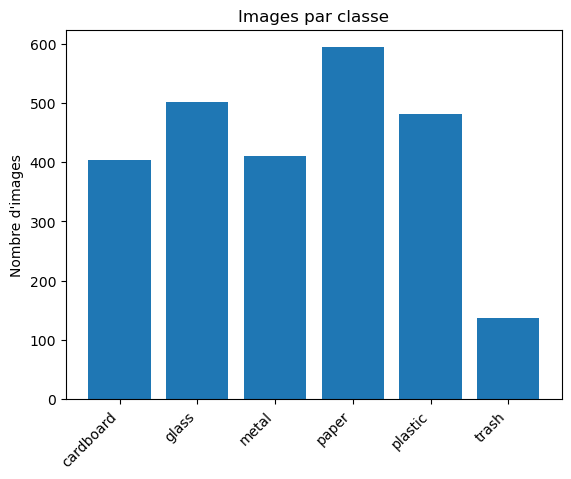

In [2]:
import os, json
from collections import Counter

ROOT = "."  # dossier du notebook, contenant cardboard/, glass/...
USE_MANIFEST = None  # ex: "manifest/train.json" si tu veux filtrer un split

def iter_items(root=ROOT, manifest=USE_MANIFEST):
    if manifest:
        data = json.load(open(manifest, encoding="utf-8"))
        for it in data:
            yield it["label"], os.path.join(root, it["image"])
    else:
        for cls in sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]):
            cls_dir = os.path.join(root, cls)
            for f in os.listdir(cls_dir):
                if f.lower().split(".")[-1] in {"jpg","jpeg","png","bmp","webp"}:
                    yield cls, os.path.join(cls_dir, f)

counts = Counter([lbl for lbl, _ in iter_items()])
counts
# Barplot simple
import matplotlib.pyplot as plt

plt.bar(list(counts.keys()), list(counts.values()))
plt.title("Images par classe")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Nombre d'images")
plt.show()

